In [28]:
import matplotlib.pyplot as plt
import numpy as np
import os

plt.style.use('ggplot')

In [29]:
def load_data_from_file(file_path):
    """Loads the data from a file and returns it as a numpy array."""
    if os.path.exists(file_path):
        # Load data assuming it's in a CSV format, modify this part for other formats
        data = np.loadtxt(file_path, delimiter=',', skiprows=1)  # Adjust `skiprows` as needed
        return data
    else:
        print(f"File {file_path} not found.")
        return None

results_directoy    = './temporal_predictive_coding/results'
runs                = os.listdir(results_directoy)
runs_data           = []

for file_name in runs:
    file_path = os.path.join(results_directoy, file_name)
    runs_data.append(load_data_from_file(file_path))
    

In [30]:
def moving_average(a, n=100):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

ma_pred_error   = []
ma_vfe          = []
ma_steps        = []

for i, run in enumerate(runs):
    ma_pred_error.append(moving_average(runs_data[i][:, 1]))
    ma_vfe.append(moving_average(runs_data[i][:, 2]))
    ma_steps.append(moving_average(runs_data[i][:, 3]))

ma_steps        = np.array(ma_steps)
avg_ma_steps    = np.average(ma_steps, axis=0)
std_ma_steps    = np.std(ma_steps, axis=0)

ma_vfe        = np.array(ma_vfe)
avg_ma_vfe    = np.average(ma_vfe, axis=0)
std_ma_vfe    = np.std(ma_vfe, axis=0)

ma_pred_error        = np.array(ma_pred_error)
avg_ma_pred_error    = np.average(ma_pred_error, axis=0)
std_ma_pred_error    = np.std(ma_pred_error, axis=0)

25


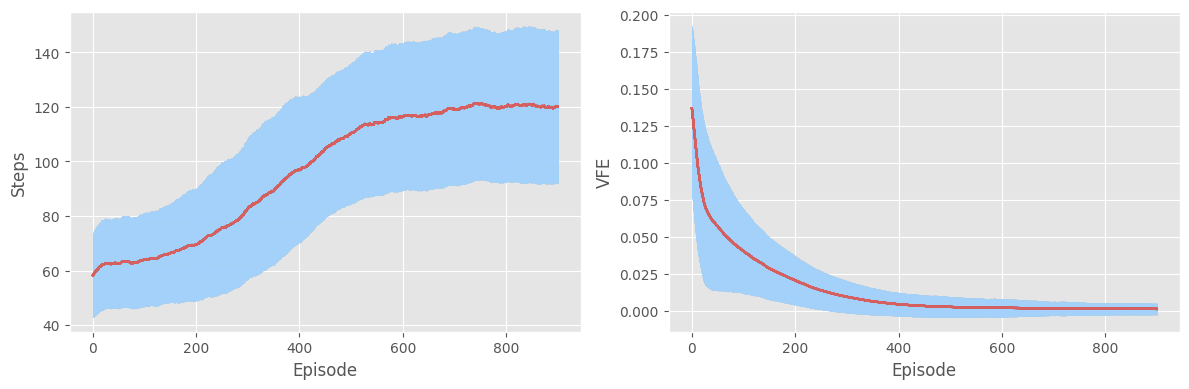

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

print(len(runs))

for i, run in enumerate(runs):
    axs[0].plot(avg_ma_steps, c='#D65F5F')  # Mellow red
    axs[0].fill_between(range(len(avg_ma_steps)),
                 avg_ma_steps - std_ma_steps,
                 avg_ma_steps + std_ma_steps,
                 color='#A3D1FF', alpha=0.15, label='Standard Deviation')  # Pastel blue
    
axs[0].set_ylabel('Steps')
axs[0].set_xlabel('Episode')

for i, run in enumerate(runs):
    axs[1].plot(avg_ma_vfe, c='#D65F5F')  # Mellow red
    axs[1].fill_between(range(len(avg_ma_vfe)),
                 avg_ma_vfe - std_ma_vfe,
                 avg_ma_vfe + std_ma_vfe,
                 color='#A3D1FF', alpha=0.15, label='Standard Deviation')  # Pastel blue

axs[1].set_ylabel('VFE')
axs[1].set_xlabel('Episode')

plt.tight_layout()
plt.show()

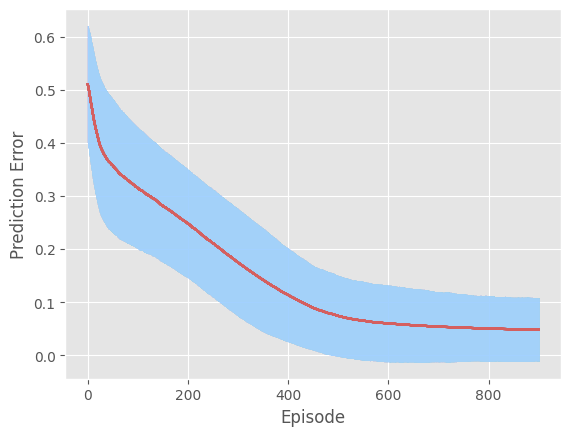

In [32]:
for i, run in enumerate(runs):
    plt.plot(avg_ma_pred_error, c='#D65F5F')  # Mellow red
    plt.fill_between(range(len(avg_ma_pred_error)),
                 avg_ma_pred_error - std_ma_pred_error,
                 avg_ma_pred_error + std_ma_pred_error,
                 color='#A3D1FF', alpha=0.15, label='Standard Deviation')  # Pastel blue
    
plt.ylabel('Prediction Error')
plt.xlabel('Episode')
plt.show()